In [1]:
from keras.layers import Flatten, Dense, Embedding
from keras.models import Sequential
import os, os.path
import zipfile
from keras.datasets import imdb
from keras import preprocessing

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

In [2]:
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(25000,)

In [4]:
y_train[:3]

array([1, 0, 0])

In [5]:
x_train=preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test=preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [6]:
x_train.shape

(25000, 20)

In [7]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 4s 5ms/step - loss: 0.6600 - acc: 0.6395 - val_loss: 0.6001 - val_acc: 0.7036
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.5252 - acc: 0.7556 - val_loss: 0.5171 - val_acc: 0.7392
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.4542 - acc: 0.7900 - val_loss: 0.4985 - val_acc: 0.7446
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4199 - acc: 0.8084 - val_loss: 0.4954 - val_acc: 0.7516
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3966 - acc: 0.8209 - val_loss: 0.4962 - val_acc: 0.7506
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3773 - acc: 0.8304 - val_loss: 0.5010 - val_acc: 0.7558
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3602 - acc: 0.8426 - val_loss: 0.5065 - val_acc: 0.7542
Epoch 8/10
625/625 [==============================] - 2s 2ms/step - loss: 0.

In [9]:
if not os.path.exists("./data"):
    os.makedirs("./data")
if not os.path.exists("./data/IMDB.zip"):
  !wget --no-check-certificate http://mng.bz/0tIo \
  -O ./data/IMDB.zip

--2022-07-02 04:16:42--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2022-07-02 04:16:42--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: http://s3.amazonaws.com/text-datasets/aclImdb.zip [following]
--2022-07-02 04:16:42--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.105.141
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.105.141|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘./data/IMDB.zip’

./data/IMDB.zip     100%[===================>]  57.90M  47.1MB/s    in 1.2s    

2022-07-02 04:16:43 (47.1 MB/s) - ‘./data/IMDB.zip’ s

In [10]:
!ls data

IMDB.zip


In [11]:
local_zip = './data/IMDB.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data')
zip_ref.close()

In [12]:
imdb_dir='./data/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

In [13]:
%%time

labels = []
texts = []

# 01. neg, pos 각각의 폴더의 파일들을 확인
# 02. txt 파일을 확인 후, 파일 내용을 확인하고 texts에 추가
# 03. 폴더명이 'neg'이면 (0)을 labels에 추가, 'pos'이면 (1)을 labels에 추가
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

CPU times: user 367 ms, sys: 372 ms, total: 739 ms
Wall time: 848 ms


In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [16]:
max_words = 10000     # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용.
maxlen = 100          # 100개 단어까지 가져오기(뒤에서부터)

tr_samples = 1000    # 훈련 샘플은 1000개입니다
val_samples = 10000  # 검증 샘플은 10,000개입니다

In [17]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)  # 텍스트 목록을 기반으로 어휘 업데이트 

In [18]:
word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print(word_index)

88582개의 고유한 토큰을 찾았습니다.
{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'br': 7, 'in': 8, 'it': 9, 'i': 10, 'this': 11, 'that': 12, 'was': 13, 'as': 14, 'for': 15, 'with': 16, 'movie': 17, 'but': 18, 'film': 19, 'on': 20, 'not': 21, 'you': 22, 'are': 23, 'his': 24, 'have': 25, 'he': 26, 'be': 27, 'one': 28, 'all': 29, 'at': 30, 'by': 31, 'an': 32, 'they': 33, 'who': 34, 'so': 35, 'from': 36, 'like': 37, 'her': 38, 'or': 39, 'just': 40, 'about': 41, "it's": 42, 'out': 43, 'has': 44, 'if': 45, 'some': 46, 'there': 47, 'what': 48, 'good': 49, 'more': 50, 'when': 51, 'very': 52, 'up': 53, 'no': 54, 'time': 55, 'she': 56, 'even': 57, 'my': 58, 'would': 59, 'which': 60, 'only': 61, 'story': 62, 'really': 63, 'see': 64, 'their': 65, 'had': 66, 'can': 67, 'were': 68, 'me': 69, 'well': 70, 'than': 71, 'we': 72, 'much': 73, 'been': 74, 'bad': 75, 'get': 76, 'will': 77, 'do': 78, 'also': 79, 'into': 80, 'people': 81, 'other': 82, 'first': 83, 'great': 84, 'because': 85, 'how': 86, 'him': 8

In [19]:
sequences = tokenizer.texts_to_sequences(texts) # 텍스트로 정수로 변환
print(type(sequences) )
print(sequences[0:1])

<class 'list'>
[[20, 1, 390, 4, 9, 44, 267, 43, 5, 94, 3, 1983, 705, 258, 42, 21, 14, 2345, 14, 3, 353, 415, 8, 12, 509, 47, 23, 1, 9457, 4844, 197, 2, 14, 369, 18, 30, 322, 117, 3, 427, 33, 196, 2297, 23, 1441, 187, 8, 3, 280, 1866, 495, 310, 402, 149, 199, 175, 763, 4, 11, 1071, 14, 1, 369, 9458, 79, 350, 5, 4483, 946, 254, 82, 1, 61, 2837, 541, 6, 12, 4, 7576, 36, 3, 1720, 32, 8595, 1489, 8, 1, 19, 7, 7, 8, 189, 45, 72, 790, 1, 422, 1, 19, 6, 14, 114, 41, 91, 705, 14, 1011, 8, 1, 602, 302, 9, 6, 32, 1983, 2070, 4077, 20, 346, 1, 427, 1065, 20, 3, 7916, 972, 392, 24, 449, 122, 426, 32, 2142, 4588, 82, 252, 196, 369, 303, 5, 5, 87, 244, 71, 2, 11, 1, 436, 8, 1, 973, 6, 32, 6792, 1391, 9654, 5, 6259, 1, 369, 8, 24, 110, 24, 796, 1, 39, 24, 2, 35, 113, 14, 3, 5794, 1155, 5, 1, 4845, 2, 72, 847, 4716, 9, 6, 569, 218, 12, 37, 1, 333, 8, 1461, 1, 468, 4, 1, 5795, 6436, 1160, 333, 6, 4939, 15, 1, 5924, 4, 1, 19, 8058, 32, 558, 43, 4, 2086, 5, 24, 989, 30, 1, 593, 488, 7, 7, 329, 342, 14, 3,

In [20]:
np.ndim(sequences), len(sequences), type(sequences)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


(1, 25000, list)

In [21]:
data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


In [22]:
# tr_samples = 200    # 훈련 샘플은 200개입니다
tr_samples = 200    # 훈련 샘플은 200개입니다
val_samples = 10000  # 검증 샘플은 10,000개입니다

In [23]:
# 샘플이 순서대로 있기 때문에 (부정 샘플이 모두 나온 후에 긍정 샘플이 옵니다) 
# 먼저 데이터를 섞습니다.
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

X_train = data[:tr_samples]
y_train = labels[:tr_samples]
X_val = data[tr_samples: tr_samples + val_samples]
y_val = labels[tr_samples: tr_samples + val_samples]

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((200, 100), (10000, 100), (200,), (10000,))

In [25]:
if not os.path.exists("./data"):
    os.makedirs("./data")
if not os.path.exists("./data/glove6B.zip"):
  !wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip \
  -O ./data/glove6B.zip

--2022-07-02 04:22:26--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-07-02 04:22:26--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-07-02 04:22:26--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘./data/glove6B.zip’

In [26]:
!ls -al data

total 901288
drwxr-xr-x 4 root root      4096 Jul  2 04:22 .
drwxr-xr-x 1 root root      4096 Jul  2 04:16 ..
drwxr-xr-x 4 root root      4096 Jul  2 04:17 aclImdb
-rw-r--r-- 1 root root 862182613 Oct 25  2015 glove6B.zip
-rw-r--r-- 1 root root  60711700 Nov 18  2017 IMDB.zip
drwxr-xr-x 3 root root      4096 Jul  2 04:17 __MACOSX


In [27]:
local_zip = './data/glove6B.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data')
zip_ref.close()

In [28]:
glove_dir='data'
embeddings_index = {}

# 파일 읽어오기
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")

In [29]:
# 첫번째가 단어
# 나머지는 벡터값 수치
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


In [30]:
type( word_index.items() )

dict_items

In [31]:
word_index.items()

cnt = 0 
for word, i in word_index.items():
    print(word,i)
    cnt += 1
    if cnt==15:
        break

the 1
and 2
a 3
of 4
to 5
is 6
br 7
in 8
it 9
i 10
this 11
that 12
was 13
as 14
for 15


In [32]:
embeddings_index.get('the')

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [33]:
# max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용.
# 01. embedding_matrix을 0으로 초기화
# 02. 각 단어별 100차원의 가중치를 사전 네트워크 가중치로 초기화
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
print(embedding_matrix.shape)
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)  # 각 단어별 가중치
    if i < max_words:
        if embedding_vector is not None:
            
            # 임베딩 인덱스에 없는 단어는 모두 0이 됩니다.
            embedding_matrix[i] = embedding_vector

(10000, 100)


In [34]:
embedding_matrix[0:2]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [35]:
# 모델 구현
max_words, embedding_dim, maxlen

(10000, 100, 100)

In [36]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# 10000개의 단어(샘플수)를 100개 차원 임베딩
# input_length : 시퀀스의 길이
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                320032    
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [37]:
embedding_matrix.shape

(10000, 100)

In [38]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False  # 추가적으로 Embedding를 동결

In [39]:
%%time

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 2s 244ms/step - loss: 0.9134 - acc: 0.5100 - val_loss: 0.7214 - val_acc: 0.5093
Epoch 2/10
7/7 [==============================] - 1s 132ms/step - loss: 0.6734 - acc: 0.6400 - val_loss: 0.7910 - val_acc: 0.5146
Epoch 3/10
7/7 [==============================] - 1s 221ms/step - loss: 0.7245 - acc: 0.6050 - val_loss: 1.1665 - val_acc: 0.5000
Epoch 4/10
7/7 [==============================] - 1s 134ms/step - loss: 0.5037 - acc: 0.6850 - val_loss: 1.0344 - val_acc: 0.4961
Epoch 5/10
7/7 [==============================] - 1s 221ms/step - loss: 0.3003 - acc: 0.9250 - val_loss: 0.6909 - val_acc: 0.5724
Epoch 6/10
7/7 [==============================] - 1s 220ms/step - loss: 0.2390 - acc: 0.9150 - val_loss: 0.7990 - val_acc: 0.5379
Epoch 7/10
7/7 [==============================] - 3s 449ms/step - loss: 0.1361 - acc: 0.9950 - val_loss: 0.8241 - val_acc: 0.5422
Epoch 8/10
7/7 [==============================] - 3s 441ms/step - loss: 0.1712 - acc: 0.95

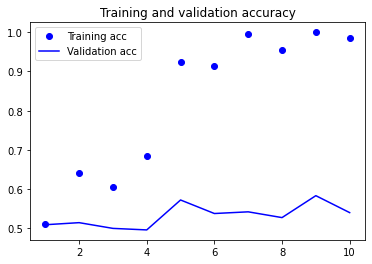

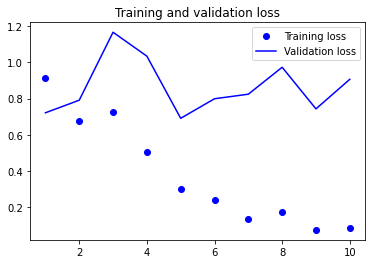

In [40]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

model.save_weights('basic_trained_glove_model.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                320032    
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 2s 167ms/step - loss: 0.6921 - acc: 0.4850 - val_loss: 0.6934 - val_acc: 0.5316
Epoch 2/10
7/7 [==============================

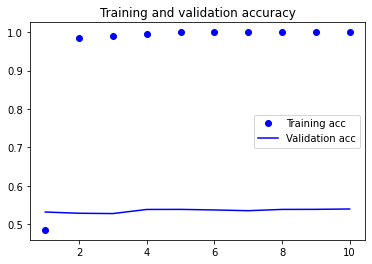

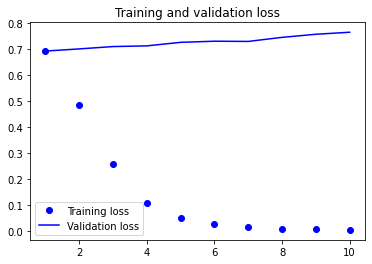

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## **훈련 모델이 더 낫다. 64%**
## 실습해 보기. 데이터를 더 늘리거나, 줄이면 어떻게 되는가?

In [43]:
%%time

test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

CPU times: user 8.18 s, sys: 1.33 s, total: 9.51 s
Wall time: 14.3 s


In [44]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.9213 - acc: 0.5357


[0.9212942123413086, 0.5356799960136414]